## This is a sample Machine Learning project that exemplifies how to use multiple ML non-supervised techniques, on one same dataset, when you have different types of variables - qualitative and quantitative - to analyse altogether, using Python, Pandas, Numpy, Scipy, Scikit-learn, Factor-Analyzer, Sympy, Pingouin, PyShp, Prince, Matplotlib, Seaborn and Plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import prince
import os
import plotly.io as pio
if os.getenv("GITHUB_ACTIONS") == "true":
    pio.renderers.default = "png"
else:
    pio.renderers.default='colab'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

- the formulas shown at this notebook have been taken from the following reference:

    FÁVERO, L. P.; BELFIORE, P. Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.
    
    Available in Brazil at:
    
    https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

## Use Case Scenario and Data - Analysis of education quality according to PISA scores: Factorial (PCA) + Correspondence Analysis

In this sample use case, we have around 100 observations, one per country, and a total of 4 variables - being 1 qualitative (group type of the country) and 3 quantitative (average grades on three general areas of knowledge per country). We wanna explore this dataset in order to find out any association between its variables, so that we may compare the countries' educational status.

In this case, we try a Factorial Analysis to see if it is possible to reduce the dimensionality of the 3 quantitative variables into one single component (or construct: education quality, for instance). The Factorial Analysis utilizes quantitative variables, and outputs quantitative variables as well, the component scores, per observation, per component. Therefore, in order to later use Correspondence Analysis on the output component scores, we must first transform them into qualitative data, for example, by doing a simple categorization. Then we'll do an SCA on the two remaining variables, the group type and the qualitative variable of such a categorization of the FA scores. And thus we'll be able to identify any association between the group type of countries and the quality level of their education.

For other examples of how to use multiple ML techniques on one same dataset, when you have variables or data that cannot be applied directly into one ML technique alone, please see the other use cases at this repository:<br>
Cluster + Correspondence Analysis:<br>
[https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/cluster-correspondence-analysis-client-segmentation.ipynb](https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/cluster-correspondence-analysis-client-segmentation.ipynb)<br>
Correspondence + Factorial (PCA) Analysis:<br>
[https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/correspondence-pca-analysis-real-estate.ipynb](https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/correspondence-pca-analysis-real-estate.ipynb)<br>

And for simpler examples and detailed info about each individual non-supervised technique used at this repository, check out these other repos, first:<br>
Cluster Analysis:<br>
[https://github.com/danielpm1982/sample-ml-clustering](https://github.com/danielpm1982/sample-ml-clustering)<br>
Factorial Analysis (PCA):<br>
[https://github.com/danielpm1982/sample-ml-pca-factorial-analysis](https://github.com/danielpm1982/sample-ml-pca-factorial-analysis)<br>
Correspondence Analysis (SCA and MCA):<br>
[https://github.com/danielpm1982/sample-ml-correspondence-analysis](https://github.com/danielpm1982/sample-ml-correspondence-analysis)

In [2]:
# reading and displaying our dataset
pisa_df = pd.read_csv('pisa_scores_2022.csv', delimiter=',')
# display all rows without ommiting anyone
pd.set_option('display.max_rows', None)
pisa_df

,country,group,mathematics_2022,reading_2022,science_2022
0,Australia,OECD,487.084253547347,498.050939783721,507.000869417628
1,Austria,OECD,487.267499088794,480.405847218299,491.270958770585
2,Belgium,OECD,489.486816801849,478.852668384217,490.578346106814
3,Canada,OECD,496.947894387322,507.132895827966,515.016675929483
4,Chile,OECD,411.696570730767,447.978957349531,443.543402462778
5,Colombia,OECD,382.696835239232,408.66502644949,411.120673264151
6,Costa Rica,OECD,384.576041069508,415.233080211732,410.986623560298
7,Czech Republic,OECD,486.999208015076,488.603668674511,497.742047097685
8,Denmark,OECD,489.273876864007,488.800990731327,493.815711635731
9,Estonia,OECD,509.946953127031,511.030331470555,525.811778388943


In [3]:
# reset display.max_rows to default setting: 5 head rows + 5 tail rows (ommitting the rest)
pd.reset_option('display.max_rows')

In [4]:
# grades are imported as string, we need them as numerals
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           96 non-null     object
 1   group             96 non-null     object
 2   mathematics_2022  96 non-null     object
 3   reading_2022      96 non-null     object
 4   science_2022      96 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB


In [5]:
# setting grades to float - instead of string: invalid grade strings will be coerced to NaN (for later deletion of the row)
pisa_df['mathematics_2022'] = pd.to_numeric(pisa_df['mathematics_2022'], errors='coerce')
pisa_df['reading_2022'] = pd.to_numeric(pisa_df['reading_2022'], errors='coerce')
pisa_df['science_2022'] = pd.to_numeric(pisa_df['science_2022'], errors='coerce')
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           96 non-null     object 
 1   group             96 non-null     object 
 2   mathematics_2022  81 non-null     float64
 3   reading_2022      81 non-null     float64
 4   science_2022      81 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.9+ KB


In [6]:
pisa_df.isna().value_counts()

country  group  mathematics_2022  reading_2022  science_2022
False    False  False             False         False           81
                True              True          True            15
Name: count, dtype: int64

In [7]:
# As you can see, 15 observations were imported with invalid grades, and are now with NaN values, and shall be removed, for our 
# data to be clean
pisa_df[pisa_df.isna().any(axis=1)]

,country,group,mathematics_2022,reading_2022,science_2022
23,Luxembourg,OECD,NaN,NaN,NaN
39,Albania (2015),PARTNERS,NaN,NaN,NaN
40,Algeria,PARTNERS,NaN,NaN,NaN
42,Argentina (2015),PARTNERS,NaN,NaN,NaN
44,Belarus,PARTNERS,NaN,NaN,NaN
45,Bosnia and Herzegovina,PARTNERS,NaN,NaN,NaN
48,B-S-J-G (China),PARTNERS,NaN,NaN,NaN
49,B-S-J-Z (China),PARTNERS,NaN,NaN,NaN
64,Kazakhstan (2015),PARTNERS,NaN,NaN,NaN
66,Lebanon,PARTNERS,NaN,NaN,NaN


In [8]:
# removing all observations with NaN values and reset indexes
pisa_df.dropna(inplace=True)
pisa_df.reset_index(drop=True, inplace=True)

In [9]:
# now we have no more NaN missing values, and all rows are OK. Instead of 96, we've now 81 rows at our cleaned dataset.
pisa_df.isna().value_counts()

country  group  mathematics_2022  reading_2022  science_2022
False    False  False             False         False           81
Name: count, dtype: int64

In [10]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           81 non-null     object 
 1   group             81 non-null     object 
 2   mathematics_2022  81 non-null     float64
 3   reading_2022      81 non-null     float64
 4   science_2022      81 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.3+ KB


In [11]:
# rows with missing values have been deleted and indexes reset. This is the starting dataset of the FA Analysis below.
pisa_df

,country,group,mathematics_2022,reading_2022,science_2022
0,Australia,OECD,487.084254,498.050940,507.000869
1,Austria,OECD,487.267499,480.405847,491.270959
2,Belgium,OECD,489.486817,478.852668,490.578346
3,Canada,OECD,496.947894,507.132896,515.016676
4,Chile,OECD,411.696571,447.978957,443.543402
...,...,...,...,...,...
76,Ukraine (18 of 27 Regions),PARTNERS,440.845309,427.526952,450.187238
77,United Arab Emirates,PARTNERS,431.110477,417.349750,431.979471
78,Uruguay,PARTNERS,408.712066,430.359724,435.384773
79,Uzbekistan,PARTNERS,363.935375,335.504900,354.863565


## Factorial Analysis (PCA)

In [12]:
# initializing Factorial PCA analysis
# excluding qualitative variables
pisa_pca_df = pisa_df.drop(columns=['country', 'group'])
pisa_pca_df

,mathematics_2022,reading_2022,science_2022
0,487.084254,498.050940,507.000869
1,487.267499,480.405847,491.270959
2,489.486817,478.852668,490.578346
3,496.947894,507.132896,515.016676
4,411.696571,447.978957,443.543402
...,...,...,...
76,440.845309,427.526952,450.187238
77,431.110477,417.349750,431.979471
78,408.712066,430.359724,435.384773
79,363.935375,335.504900,354.863565


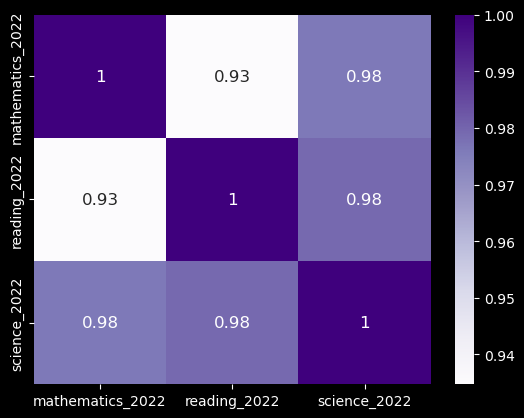

In [13]:
# creating Pearson's correlation matrix and heatmap
pisa_corr_df = pisa_pca_df.corr()
pisa_corr_df
sns.heatmap(pisa_corr_df, annot=True, 
            cmap = plt.cm.Purples,
            annot_kws={'size':12});
# observe we have very high positive correlations between all variables, which indicate not only that the analyis is viable and 
# that we'll be able to find high-variance constructs, or components, reducing dimensionality into fewer dimensions, but that 
# actually only one component (or construct or dimension) will probably do, as we intended since the begining. Bartlet sphericity 
# test, on the sequence, confirms the high significance (p=0.0 <<< alfa=0.05) between variables at the correlation matrix.

In [14]:
pisa_pca_df.describe()

,mathematics_2022,reading_2022,science_2022
count,81.000000,81.000000,81.000000
mean,437.628559,435.037917,446.893945
std,58.219370,56.104751,55.724807
min,336.396041,328.842780,347.104162
25%,388.781607,386.284748,403.130242
50%,440.845309,438.440625,446.967114
75%,483.159455,480.405847,493.549319
max,574.663820,542.553322,561.433275


In [15]:
# bartlet sphericity test
bartlett, p_value = calculate_bartlett_sphericity(pisa_pca_df)
print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-value: {round(p_value, 2)}')

Qui² Bartlett: 508.46
p-value: 0.0


In [16]:
# instantiating the fa object, initially for max possible components (same number of variables)
fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(pisa_pca_df)

In [17]:
# getting the eigenvalues - absolute, relative and cumulative - for all variables
eigenvalues_variances = fa.get_factor_variance()
eigen_table = pd.DataFrame(eigenvalues_variances)
eigen_table.columns = [f"Component {i+1}" for i, v in enumerate(eigen_table.columns)]
eigen_table.index = ['Absolute Variance','Relative Variance', 'Accumulated Variance']
eigen_table = eigen_table.T
print(eigen_table)

# observe that, according to the Kaiser or latent root criteria (lambda>1), we should choose only the first Component, which,
# as we expected, already accounts for 97.56% of all factorial score variance, and, therefore, for a similar proportion of the
# representation of the data, on that single axis (dimension).

             Absolute Variance  Relative Variance  Accumulated Variance
Component 1           2.926879           0.975626              0.975626
Component 2           0.065292           0.021764              0.997390
Component 3           0.007830           0.002610              1.000000


In [18]:
# re-instantiating the fa object for only 1 Component (dimension)
fa = FactorAnalyzer(n_factors=1, method='principal', rotation=None).fit(pisa_pca_df)

In [19]:
# calculating and presenting loadings of each original variable on each component (only one in this case)
loadings = fa.loadings_
loadings_table = pd.DataFrame(loadings)
loadings_table.columns = [f"C{i+1} loading" for i, v in enumerate(loadings_table.columns)]
loadings_table.index = pisa_pca_df.columns
print(loadings_table)

# observe the high loading - pearson correlation - of all 3 variables towards C1. This means that the abstract construct C1 will
# not only contain 97.56% of all variance (data representation), but will correlate almost perfectly with either of the 3 original 
# variables when taken separately, being such a Component a perfect reduction of the three into one single Component variable.

                  C1 loading
mathematics_2022    0.982323
reading_2022        0.983425
science_2022        0.997394


In [20]:
# calculating and displaying the communialities
# observe we have only a minimum loss on variance, when taken only the first Component and excluded the others, as our communality
# loss keeps < 4% when considered only the first Component, which corroborates the factor_variance analysis above
communalities = fa.get_communalities()
communalities_table = pd.DataFrame(communalities)
communalities_table.columns = ['Communalities']
communalities_table.index = pisa_pca_df.columns
print(communalities_table)

                  Communalities
mathematics_2022       0.964959
reading_2022           0.967125
science_2022           0.994794


In [21]:
# calculating and extracting component scores for C1, for each observation
# we're labeling C1 score to a more semantic construct name, for instance, Education.Quality.2022
scores_df = pd.DataFrame(fa.transform(pisa_pca_df))
scores_df.columns =  [f"Education.Quality.2022"]
scores_df

,Education.Quality.2022
0,1.036457
1,0.834398
2,0.833650
3,1.197725
4,-0.093057
...,...
76,-0.006338
77,-0.236173
78,-0.266747
79,-1.593559


In [22]:
# adding factorial score to the base dataset (pisa_df)
pisa_df = pd.concat([pisa_df, scores_df], axis=1)
pisa_df

,country,group,mathematics_2022,reading_2022,science_2022,Education.Quality.2022
0,Australia,OECD,487.084254,498.050940,507.000869,1.036457
1,Austria,OECD,487.267499,480.405847,491.270959,0.834398
2,Belgium,OECD,489.486817,478.852668,490.578346,0.833650
3,Canada,OECD,496.947894,507.132896,515.016676,1.197725
4,Chile,OECD,411.696571,447.978957,443.543402,-0.093057
...,...,...,...,...,...,...
76,Ukraine (18 of 27 Regions),PARTNERS,440.845309,427.526952,450.187238,-0.006338
77,United Arab Emirates,PARTNERS,431.110477,417.349750,431.979471,-0.236173
78,Uruguay,PARTNERS,408.712066,430.359724,435.384773,-0.266747
79,Uzbekistan,PARTNERS,363.935375,335.504900,354.863565,-1.593559


In [23]:
# listing original dataset df ordered by the new construct: Education.Quality.2022 (descending order)
# As C1 is the only Component at our output, this df below would be the ranking itself, regarding the factorial scores. Only 
# if we had more than one Component, it would make sense to do a weighted summation, according to each Component's relative 
# variance
pisa_df.sort_values("Education.Quality.2022", ascending=False, inplace=False)

,country,group,mathematics_2022,reading_2022,science_2022,Education.Quality.2022
74,Singapore,PARTNERS,574.663820,542.553322,561.433275,2.147594
57,Macao (China),PARTNERS,551.923153,510.405122,543.096281,1.709122
44,Chinese Taipei,PARTNERS,547.094164,515.167290,537.380381,1.674636
19,Japan,OECD,535.579306,515.854614,546.634453,1.668927
20,Korea,OECD,527.302502,515.415392,527.822418,1.502512
...,...,...,...,...,...,...
69,Philippines,PARTNERS,354.719713,346.547387,356.167293,-1.572451
56,Kosovo,PARTNERS,354.962444,342.194421,357.024052,-1.592002
79,Uzbekistan,PARTNERS,363.935375,335.504900,354.863565,-1.593559
47,Dominican Republic,PARTNERS,339.107247,351.312287,360.426060,-1.608095


In [24]:
# calculating weights (coefficients) for each variable at the Component C1 expression (from which factorial scores are calculated)
weights_df = fa.weights_
weights_df = pd.DataFrame(weights_df)
weights_df.columns = [f"C{i+1} weight" for i, v in enumerate(scores_df.columns)]
weights_df.index = pisa_pca_df.columns
weights_df_transposed = weights_df.T
weights_df_transposed

,mathematics_2022,reading_2022,science_2022
C1 weight,0.335621,0.335998,0.34077


In [25]:
# mounting the factorial score expression for each component j (considering each variable k: X1, X2 and X3), in order that we're 
# able to calculate manually - if we wished - the factorial scores for each observation i. The values Xi, of each variable, for 
# each observation, must be in Z score
for index, row in weights_df_transposed.iterrows():
    print(f"{index[:2]}: ({round(row["mathematics_2022"],6)})*ZX1i + ({round(row['reading_2022'],6)})*ZX2i + ({round(row['science_2022'],6)})*ZX3i")

C1: (0.335621)*ZX1i + (0.335998)*ZX2i + (0.34077)*ZX3i


In [26]:
# the output of the factorial PCA analysis is the set of factorial scores for the created Components, in our case, the 
# Education.Quality.2022 single component, which is also a quantitative variable, as are the inputs for this technique (PISA 
# grades)
# As we then wish to use the Education.Quality.2022 component at a Correspondence Analysis, we must transform it to a qualitative
# variable first, for exemple, by doing a categorization on its values:

# Creating 4 categories for the quantitative Education.Quality.2022 data
pisa_df['Education.Quality.2022.Quali'] = pd.qcut(pisa_df['Education.Quality.2022'], 4, labels=list(['low', 'avg_low', 'avg_high', 'high']))
pd.set_option('display.max_rows', None)

# descending sorting and reindexing the base df (pisa_df), according to Education.Quality.2022 (quantitative), after having 
# concatenated the Education.Quality.2022.Quali categories' column
# This new reindexed pisa_df is the base df taken as input to the Correspondence Analysis (SCA) below 
pisa_df = pisa_df.sort_values("Education.Quality.2022", ascending=False)
pisa_df.reset_index(drop=True, inplace=True)
pisa_df

,country,group,mathematics_2022,reading_2022,science_2022,Education.Quality.2022,Education.Quality.2022.Quali
0,Singapore,PARTNERS,574.663820,542.553322,561.433275,2.147594,high
1,Macao (China),PARTNERS,551.923153,510.405122,543.096281,1.709122,high
2,Chinese Taipei,PARTNERS,547.094164,515.167290,537.380381,1.674636,high
3,Japan,OECD,535.579306,515.854614,546.634453,1.668927,high
4,Korea,OECD,527.302502,515.415392,527.822418,1.502512,high
5,Hong Kong (China),PARTNERS,540.351801,499.701341,520.418680,1.437955,high
6,Estonia,OECD,509.946953,511.030331,525.811778,1.363041,high
7,Canada,OECD,496.947894,507.132896,515.016676,1.197725,high
8,Ireland,OECD,491.648280,516.009975,503.845537,1.151738,high
9,Switzerland,OECD,507.990586,483.331734,502.523242,1.041476,high


In [27]:
pd.reset_option('display.max_rows')

## Correspondence Analysis (SCA)

In [33]:
# creating the only contingency table of our SCA for our two qualitative variables: Education.Quality.2022.Quali and group
# all categories from these two variables are crossed regarding their observed frequencies
contingency_table_df = pd.crosstab(pisa_df['Education.Quality.2022.Quali'], pisa_df['group'])
contingency_table_df

group,OECD,PARTNERS
Education.Quality.2022.Quali,,
low,0,21
avg_low,5,15
avg_high,16,4
high,16,4


In [34]:
# performing chi2 test between the two qualitative variables to check if there is any significant association between them two - 
# and, therefore, between some of their categories
test_chi2 = chi2_contingency(contingency_table_df)
print(f"chi² statistic: {round(test_chi2[0], 2)}")
print(f"p-value: {round(test_chi2[1], 4)}")
print(f"degrees of freedom (ddof): {test_chi2[2]}")

chi² statistic: 40.09
p-value: 0.0
degrees of freedom (ddof): 3


In [36]:
# considering the positive test above, and confirmed that the two variables are significantly associated, we must now identify
# which categories (from those vabriables) are responsible for that association, which can be done by analysing the Z-adjusted 
# standardized residuals table
residuals_stats = sm.stats.Table(contingency_table_df)
residuals_stats.standardized_resids

group,OECD,PARTNERS
Education.Quality.2022.Quali,,
low,-4.736823,4.736823
avg_low,-2.170425,2.170425
avg_high,3.510703,-3.510703
high,3.510703,-3.510703


In [39]:
# plotting a heatmap graph for the adjusted standardized residuals, on which Z values greater than 1.96 represent significant
# association between the compared categories, from the two respective variables, considered a significance value of 0.05
fig = go.Figure()

maxz = np.max(residuals_stats.standardized_resids)+0.1
minz = np.min(residuals_stats.standardized_resids)-0.1

colorscale = ['purple' if i>1.96 else '#FAF9F6' for i in np.arange(minz,maxz,0.01)]

fig.add_trace(
    go.Heatmap(
        x = residuals_stats.standardized_resids.columns,
        y = residuals_stats.standardized_resids.index,
        z = np.array(residuals_stats.standardized_resids),
        text=residuals_stats.standardized_resids.values,
        texttemplate='%{text:.2f}',
        showscale=False,
        colorscale=colorscale))

fig.update_layout(
    title='<b>Z-Adjusted Standardized Residuals</b>',
    title_x = 0.5,
    height = 600,
    width = 600)

fig.show()

In [42]:
# As observed direclty at the adjusted standardized residuals heatmap above, "OECD" category - from the "group" variable - is 
# significantly associated with the categories "high" and "avg_high" - from the "Education.Quality.2022.Quali" variable, while 
# the category "PARTNERS" - from the "group" variable - is significantly associated with the categories "avg_low" and "low" -
# from the "Education.Quality.2022.Quali" variable.

In [57]:
# For SCA, the max dimensions can be calculated as min((I-1),(J-1)) - I=categories in line categories (4) and J=categories in 
# column categories (2) - which would give us:
max_dim = min((4-1),(2-1))
print(f"max_dimensions = {max_dim}")
# So, for such a use case, we could have at most one dimension, or one component or lambda, at our analysis. Therefore, even if 
# we did it manually, by trying to generate the A and W matrices, the Mass matrix, the eigenvalue lambda, the singular value, 
# the eigenvector values and the coordinates for the categories, actually we wouldn't find a suficient eigenvector to calculate 
# the coordinates from, and a one dimension can't be plotted (you need 2 or 3 dimensions).

# Therefore, the only alternative we have is to analyse only the Z-adjusted standardized residuals, as we did above, and stop the 
# Correspondence Analysis right there. We can't generate a perceptual map in such a case. But we could visualize the statistical
# significant association between the categories, anyway.

max_dimensions = 1
